# Section 03: Facets

### **`01-Facet layer basics`**

Faceting splits the data up into groups, according to a categorical variable, then plots each group in its own panel. For splitting the data by one or two categorical variables, `facet_grid()` is best.

Given categorical variables `A` and `B`, the code pattern is

    plot +
      facet_grid(rows = vars(A), cols = vars(B))

This draws a panel for each pairwise combination of the values of `A` and `B`.

Here, we'll use the `mtcars` data set to practice. Although `cyl` and `am` are not encoded as factor variables in the data set, `ggplot2` will coerce variables to factors when used in facets.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
mtcars <- read.csv("..\\00_Datasets\\mtcars_v2.csv", header=TRUE)
head(mtcars, 3)

,X,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fcyl,fam,car,fcyl_fam,fvs
,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
1,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,6,manual,Mazda RX4,6:01,V-shaped
2,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,6,manual,Mazda RX4 Wag,6:01,V-shaped
3,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,4,manual,Datsun 710,4:01,straight


-   Facet the plot in a grid, with each `am` value in its own row.


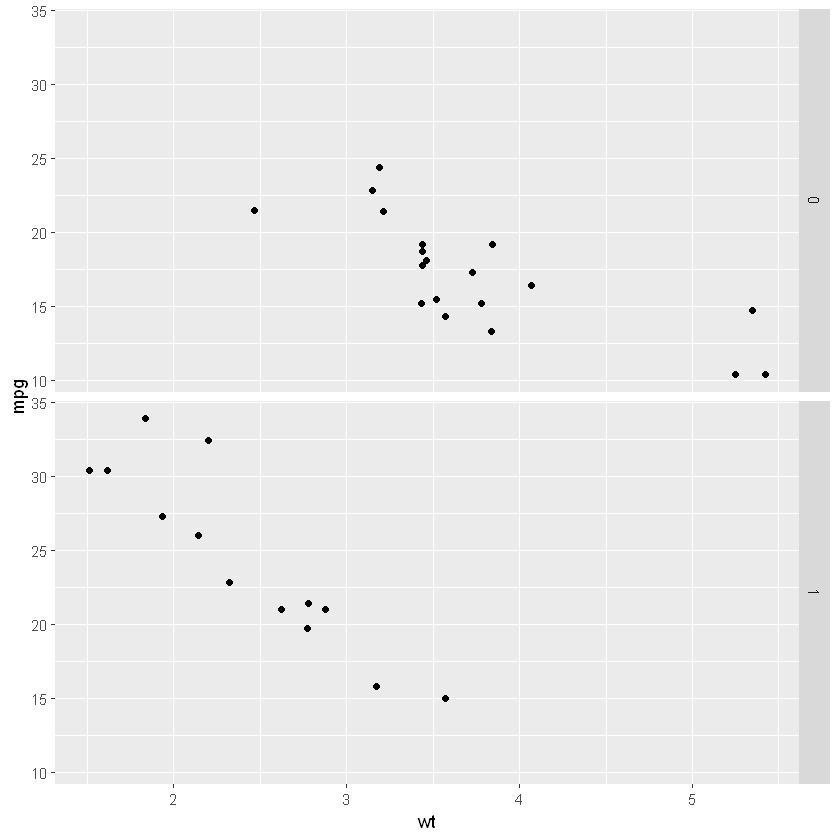

In [4]:
ggplot(mtcars, aes(wt, mpg)) + 
  geom_point() +
  # Facet rows by am
  facet_grid(rows = vars(am))

-   Facet the plot in a grid, with each `cyl` value in its own column.


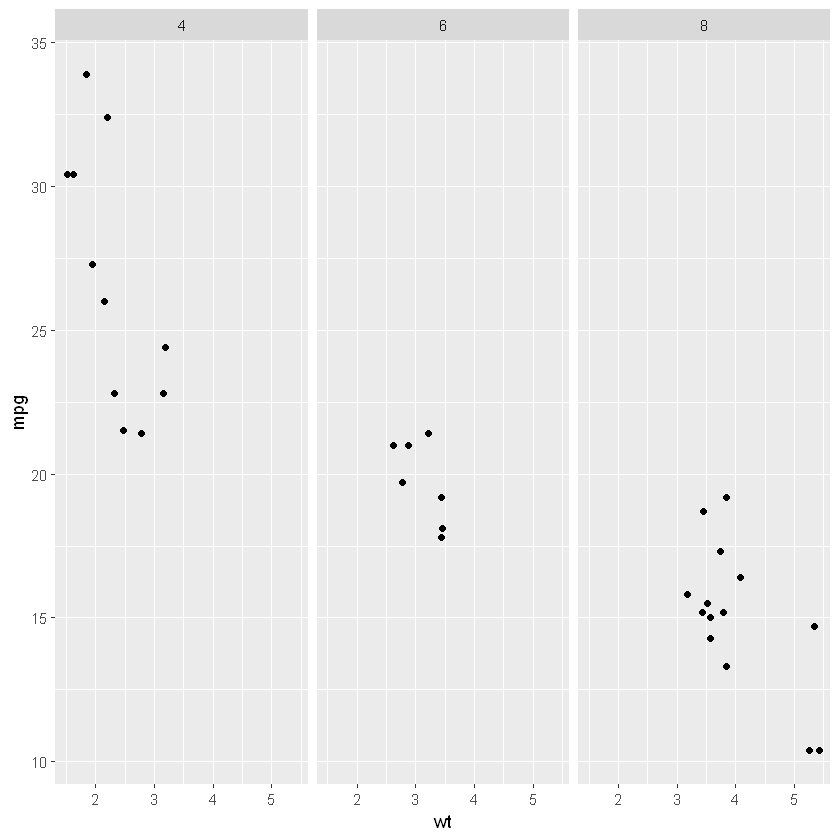

In [5]:
ggplot(mtcars, aes(wt, mpg)) + 
  geom_point() +
  # Facet columns by cyl
  facet_grid(cols = vars(cyl))

-   Facet the plot in a grid, with each `am` value in its own row and each `cyl` value in its own column.


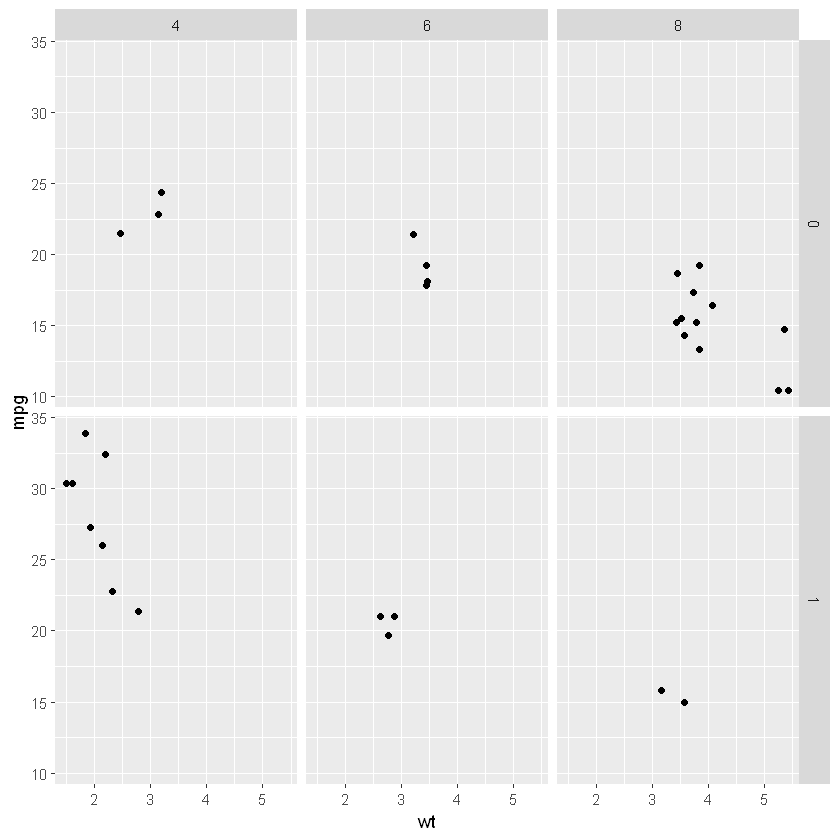

In [6]:
ggplot(mtcars, aes(wt, mpg)) + 
  geom_point() +
  # Facet rows by am and columns by cyl
  facet_grid(rows = vars(am), cols = vars(cyl))

### **`02-Many variables`**

-   Map `fcyl_fam` onto the a `color` aesthetic.

-   Add a `scale_color_brewer()` layer and set `"Paired"` as the `palette`.

[1] "6:01" "6:01" "4:01" "6:00" "8:00" "6:00" "8:00" "4:00" "4:00" "6:00"
[11] "6:00" "8:00" "8:00" "8:00" "8:00" "8:00" "8:00" "4:01" "4:01" "4:01"
[21] "4:00" "8:00" "8:00" "8:00" "8:00" "4:01" "4:01" "4:01" "8:01" "6:01"
[31] "8:01" "4:01"

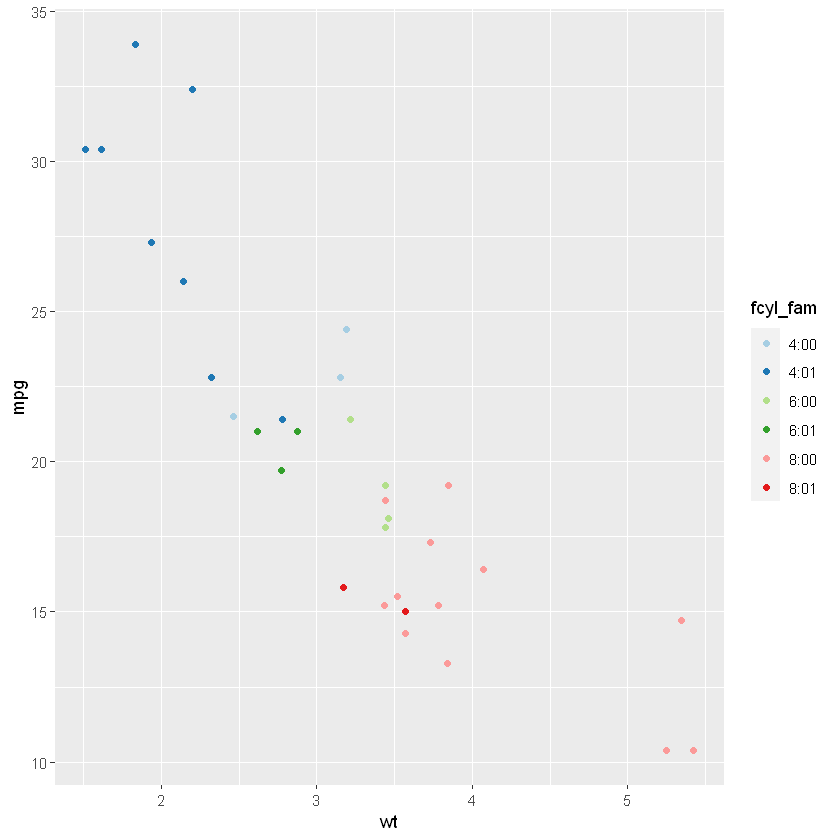

In [7]:
# See the interaction column
mtcars$fcyl_fam

# Color the points by fcyl_fam
ggplot(mtcars, aes(x = wt, y = mpg, color = fcyl_fam)) +
  geom_point() +
  # Use a paired color palette
  scale_color_brewer(palette = "Paired")

-   Map `disp`, the displacement volume from each cylinder, onto the `size` aesthetic.


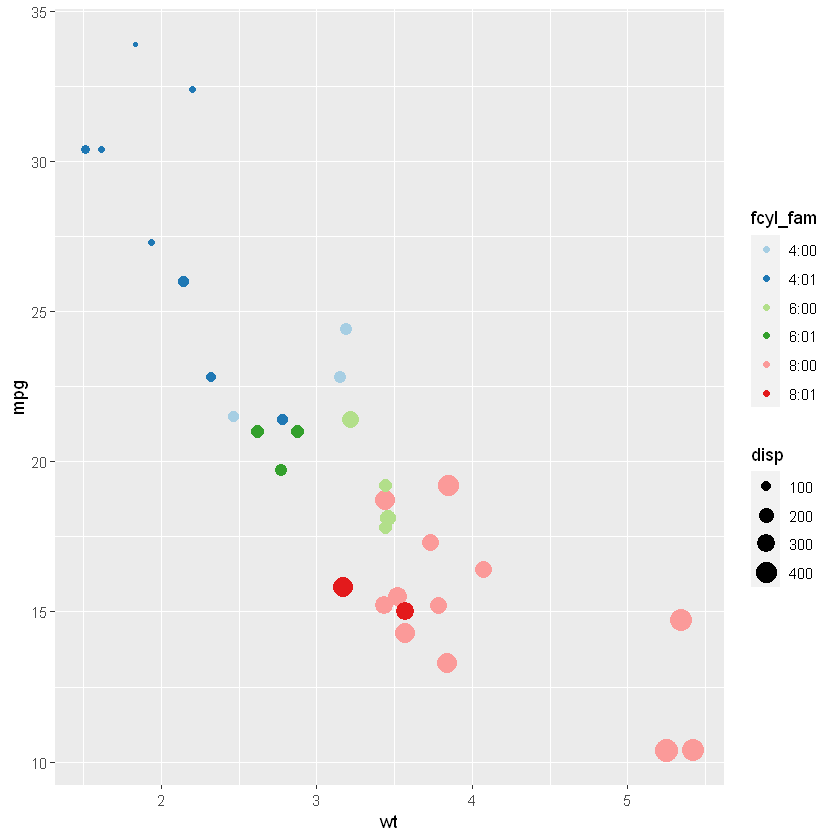

In [8]:
# Update the plot to map disp to size
ggplot(mtcars, aes(x = wt, y = mpg, color = fcyl_fam, size = disp)) +
  geom_point() +
  scale_color_brewer(palette = "Paired")

-   Add a `facet_grid()` layer, faceting the plot according to `gear` on rows and `vs` on columns.

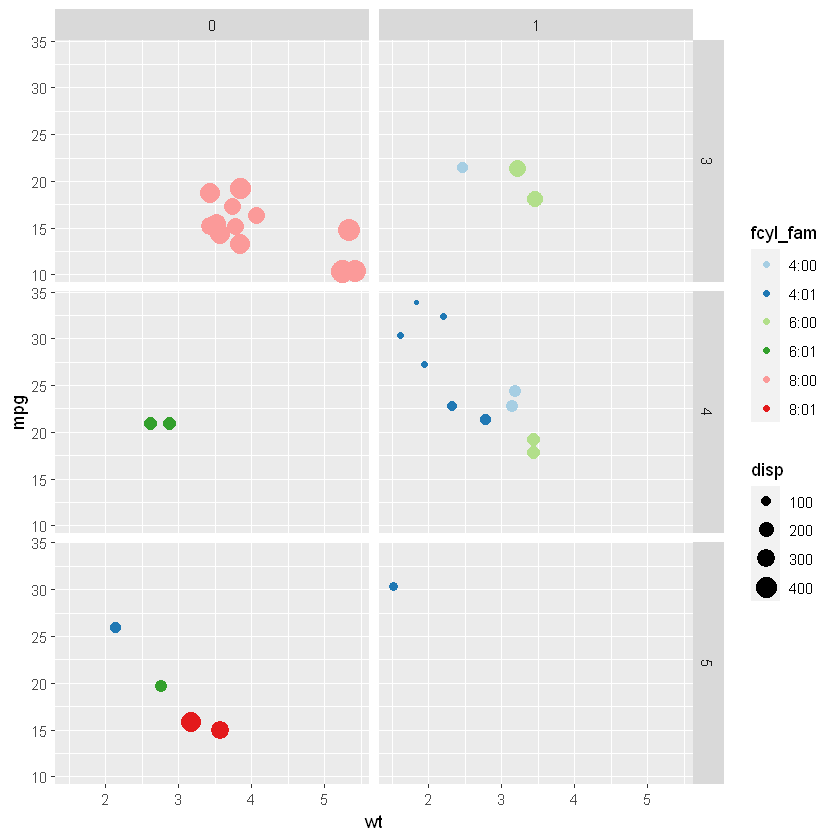

In [9]:
# Update the plot
ggplot(mtcars, aes(x = wt, y = mpg, color = fcyl_fam, size = disp)) +
  geom_point() +
  scale_color_brewer(palette = "Paired") +
  # Grid facet on gear and vs
  facet_grid(rows = vars(gear), cols = vars(vs))

### **`03-Formula notation`**

As well as the `vars()` notation for specifying which variables should be used to split the dataset into facets, there is also a traditional formula notation. The three cases are shown in the table.

    | Modern notation                            | Formula notation  |
    |--------------------------------------------|-------------------|
    | facet_grid(rows = vars(A))                 | facet_grid(A ~ .) |
    | facet_grid(cols = vars(B))                 | facet_grid(. ~ B) |
    | facet_grid(rows = vars(A), cols = vars(B)) | facet_grid(A ~ B) |

`mpg_by_wt` is available again. Rework the previous plots, this time using formula notation.

-   Facet the plot in a grid, with each `am` value in its own row.

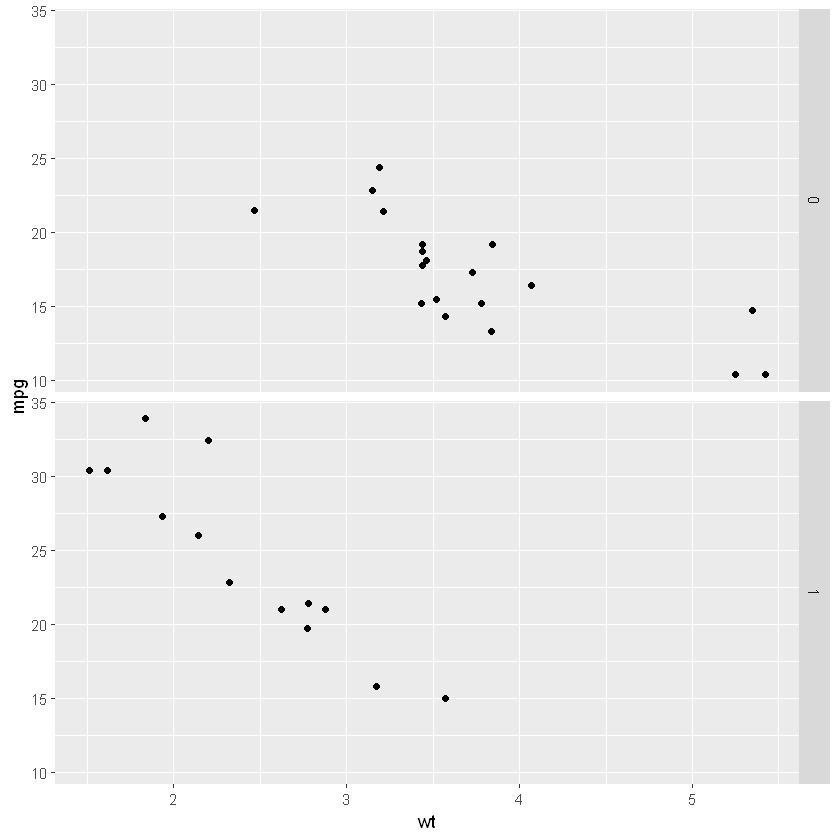

In [10]:
ggplot(mtcars, aes(wt, mpg)) + 
  geom_point() +
  # Facet rows by am using formula notation
  facet_grid(am ~ .)

-   Facet the plot in a grid, with each `cyl` value in its own column.


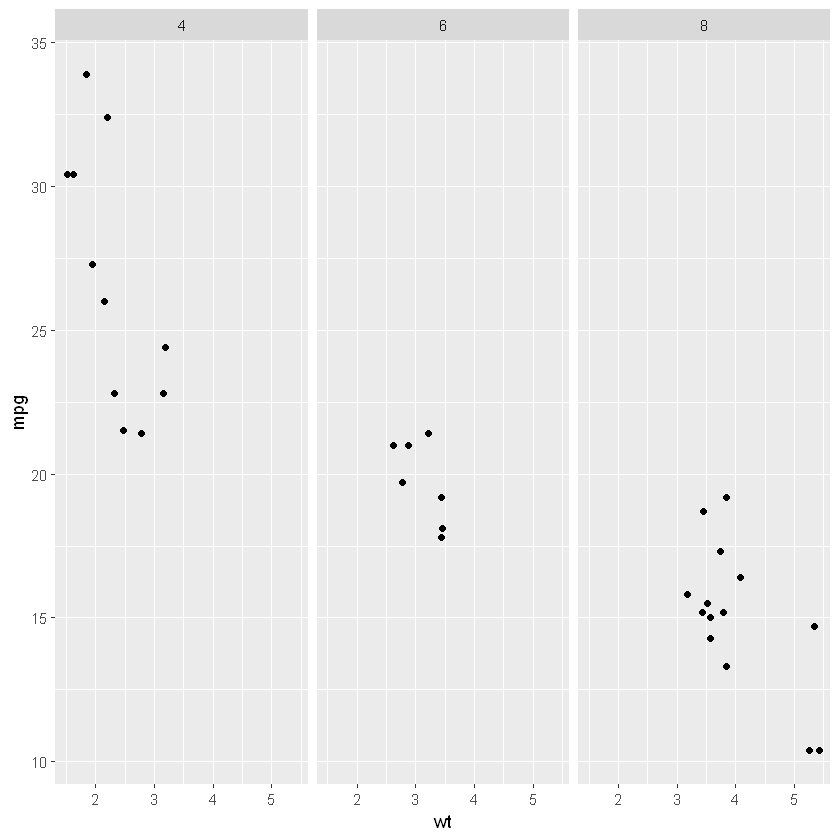

In [11]:
ggplot(mtcars, aes(wt, mpg)) + 
  geom_point() +
  # Facet columns by cyl using formula notation
  facet_grid(. ~ cyl)

-   Facet the plot in a grid, with each `am` value in its own row and each `cyl` value in its own column.


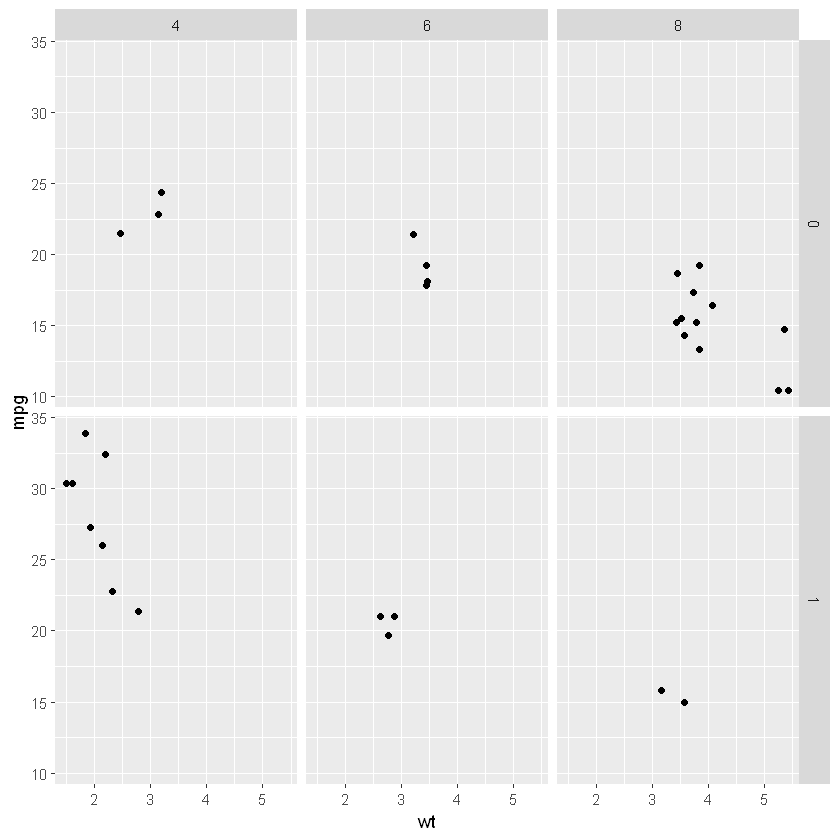

In [12]:
ggplot(mtcars, aes(wt, mpg)) + 
  geom_point() +
  # Facet rows by am and columns by cyl using formula notation
  facet_grid(am ~ cyl)

### **`04-Labeling facets`**

If your factor levels are not clear, your facet labels may be confusing. You can assign proper labels in your original data *before* plotting (see next exercise), or you can use the `labeller` argument in the facet layer.

The default value is

-   `label_value`: Default, displays only the value

Common alternatives are:

-   `label_both`: Displays both the value and the variable name

-   `label_context`: Displays only the values or both the values and variables depending on whether multiple factors are faceted

#### `Questions`

-   Add a `facet_grid()` layer and facet `cols` according to the `cyl` using `vars()`. There is no labeling.

-   Apply `label_both` to the `labeller` argument and check the output.

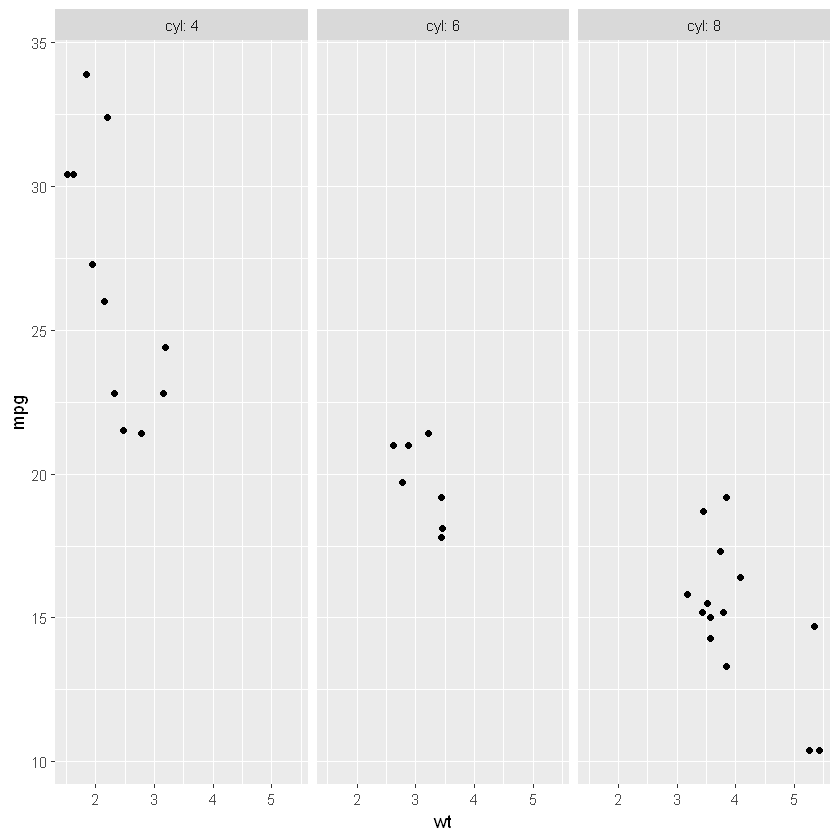

In [13]:
# Plot wt by mpg
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  # Displaying both the values and the variables
  facet_grid(cols = vars(cyl), labeller = label_both)

-   Apply `label_context` to the `labeller` argument and check the output.

In [ ]:
# Plot wt by mpg
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  # Label context
  facet_grid(cols = vars(cyl), labeller = label_context)

-   In addition to `label_context`, let's facet by one more variable: `vs`.

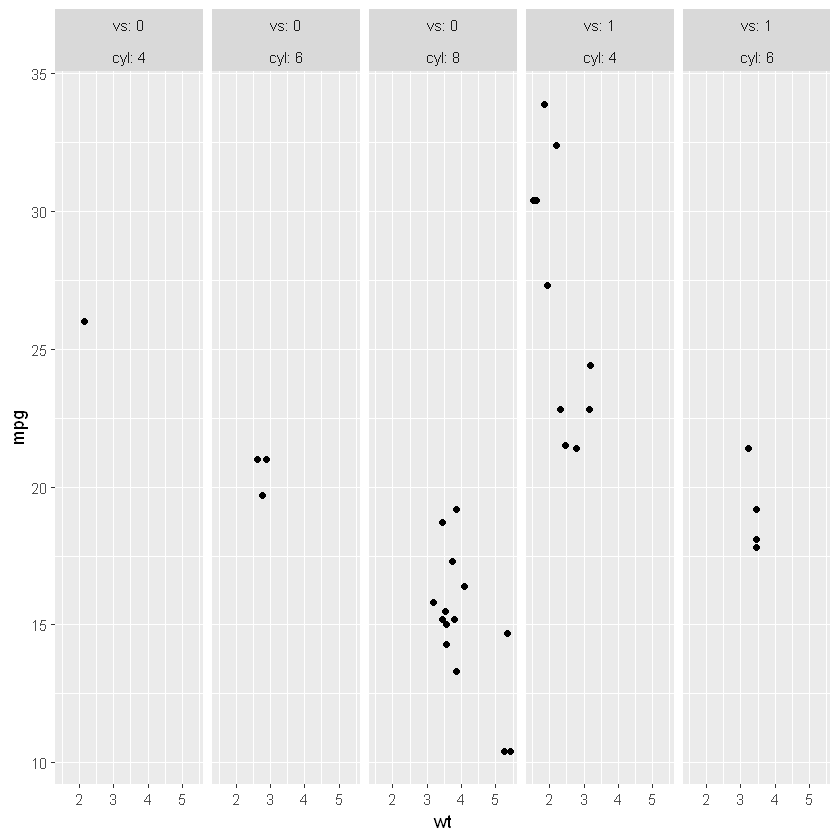

In [14]:
# Plot wt by mpg
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  # Two variables
  facet_grid(cols = vars(vs, cyl), labeller = label_context)

### **`05-Setting order`**

If you want to change the order of your facets, it's best to properly define your factor variables *before* plotting.

Let's see this in action with the `mtcars` transmission variable `am`. In this case, `0` = "automatic" and `1` = "manual".

Here, we'll make `am` a factor variable and relabel the numbers to proper names. The default order is alphabetical. To rearrange them we'll call `fct_rev()` from the `forcats` package to reverse the order.

-   Explicitly label the `0` and `1` values of the `am` column as `"automatic"` and `"manual"`, respectively.

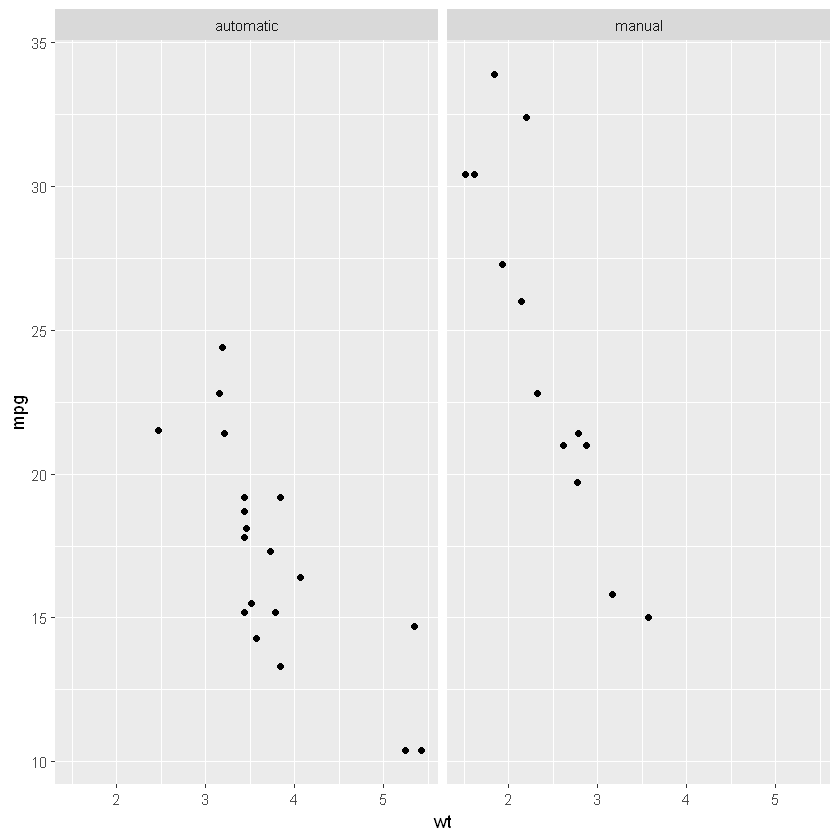

In [15]:
# Make factor, set proper labels explictly
mtcars$fam <- factor(mtcars$am, labels = c(`0` = "automatic",
                                           `1` = "manual"))

# Default order is alphabetical
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  facet_grid(cols = vars(fam))

-   Define a specific order using separate `levels` and `labels` arguments. Recall that `1` is `"manual"` and `0` is `"automatic"`.


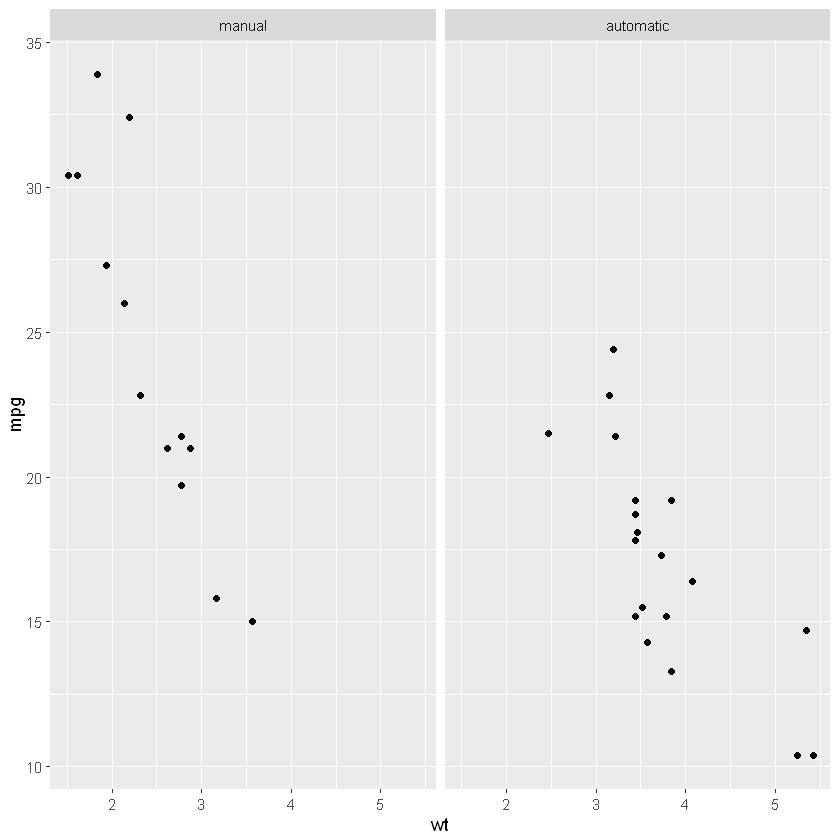

In [16]:
# Make factor, set proper labels explictly, and
# manually set the label order
mtcars$fam <- factor(mtcars$am,
                     levels = c(1, 0),
                     labels = c("manual", "automatic"))

# View again
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() +
  facet_grid(cols = vars(fam))

### **`06-Variable plotting spaces I: continuous variables`**

By default every facet of a plot has the same axes. If the data ranges vary wildly between facets, it can be clearer if each facet has its own scale. This is achieved with the `scales` argument to `facet_grid()`.

-   `"fixed"` (default): axes are shared between facets.

-   `free`: each facet has its own axes.

-   `free_x`: each facet has its own x-axis, but the y-axis is shared.

-   `free_y`: each facet has its own y-axis, but the x-axis is shared.

When faceting by columns, `"free_y"` has no effect, but we can adjust the x-axis. In contrast, when faceting by rows, `"free_x"` has no effect, but we can adjust the y-axis.

-   Update the plot to facet columns by `cyl`.

-   Update the faceting to free the x-axis scales.

-   Facet **rows** by `cyl` (rather than columns).

-   Free the **y**-axis scales (instead of x).


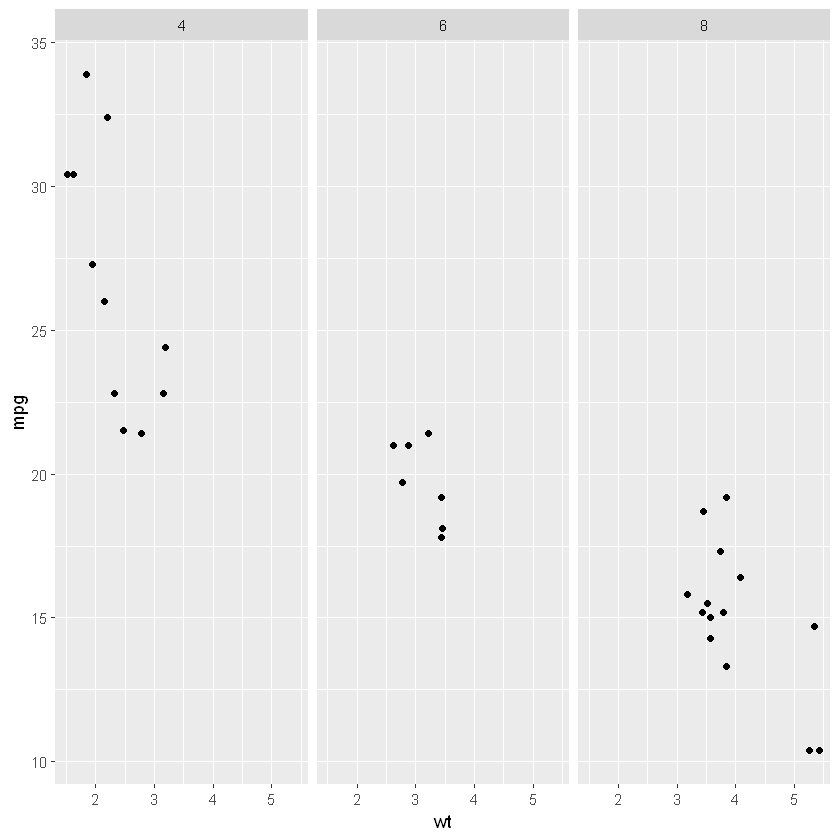

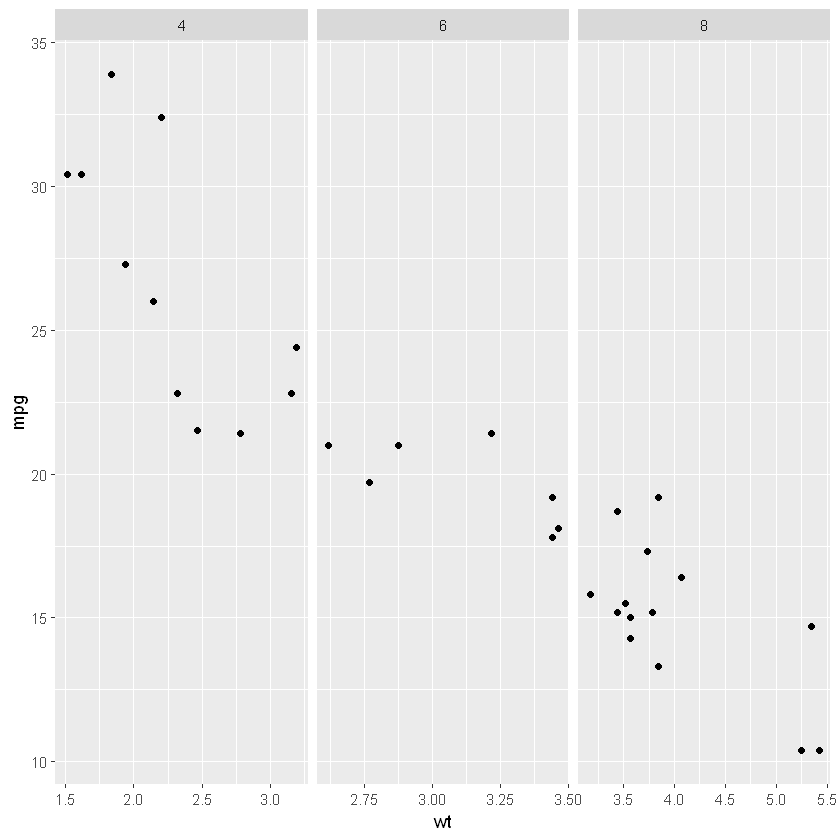

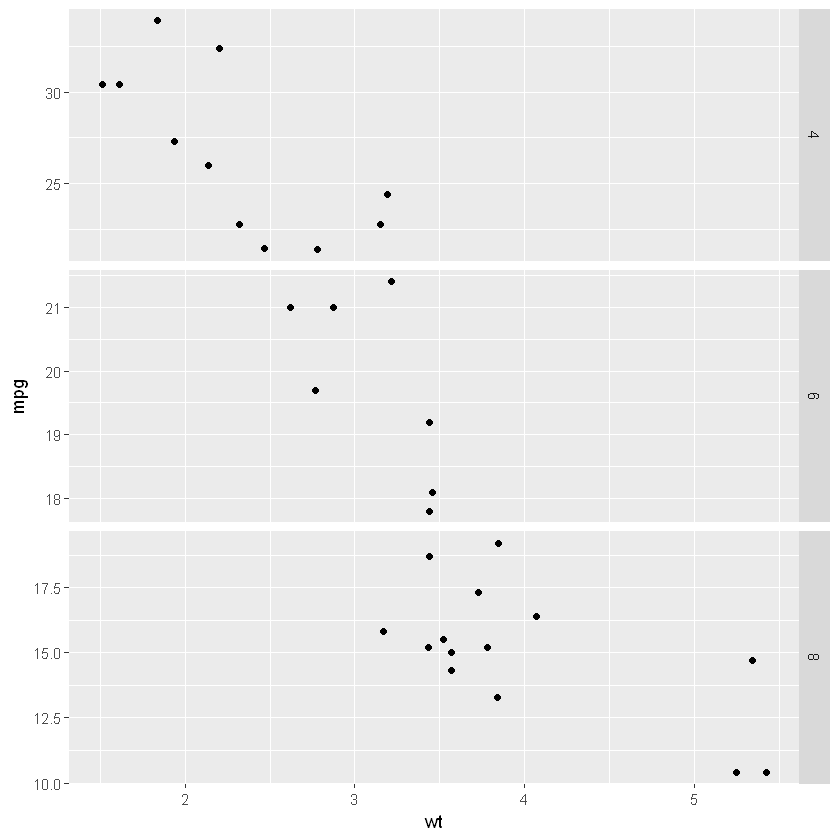

In [17]:
# Update the plot to facet columns by cyl
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() + 
  # Facet columns by cyl 
  facet_grid(cols = vars(cyl))

# Update the faceting to free the x-axis scales.
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() + 
  # Update the faceting to free the x-axis scales
  facet_grid(cols = vars(cyl), scales = "free_x")


# Facet rows by cyl (rather than columns).
ggplot(mtcars, aes(wt, mpg)) +
  geom_point() + 
  # Swap cols for rows; free the y-axis scales
  facet_grid(rows = vars(cyl), scales = "free_y")

### **`07-Variable plotting spaces II: categorical variables`**

When you have a categorical variable with many levels which are not all present in each sub-group of another variable, it's usually desirable to drop the unused levels.

By default, each facet of a plot is the same size. This behavior can be changed with the `spaces` argument, which works in the same way as `scales`: `"free_x"` allows different sized facets on the x-axis, `"free_y"`, allows different sized facets on the y-axis, `"free"` allows different sizes in both directions.

-   Facet the plot by rows according to `gear` using `vars()`. Notice that *every* car is listed in *every* facet, resulting in many lines without data.

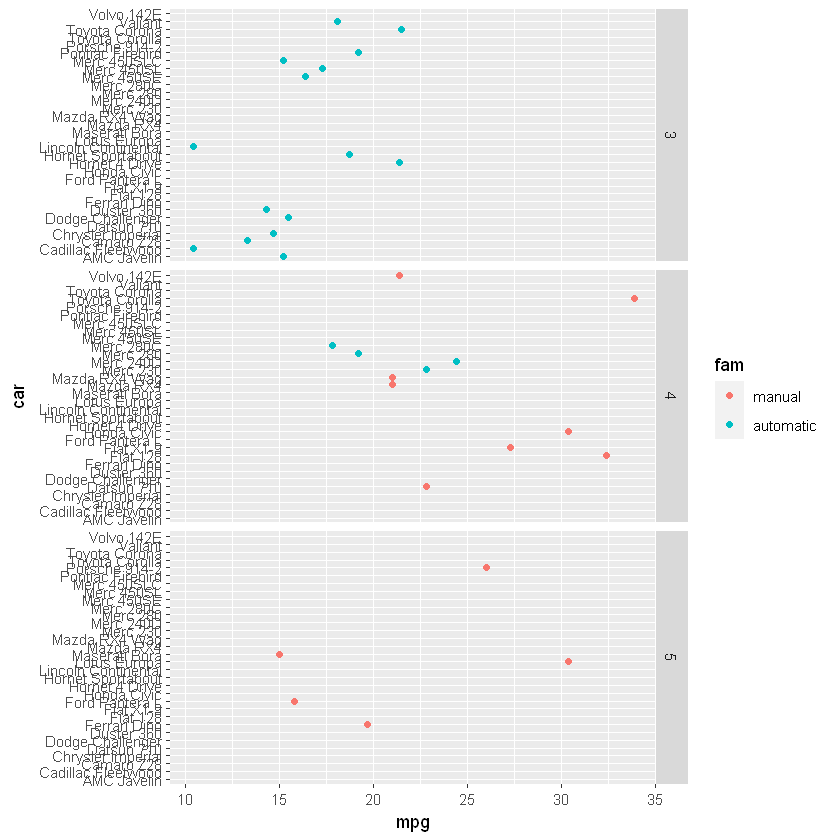

In [19]:
ggplot(mtcars, aes(x = mpg, y = car, color = fam)) +
  geom_point() +
  # Facet rows by gear
  facet_grid(rows = vars(gear))

-   To remove blank lines, set the `scales` and `space` arguments in `facet_grid()` to `free_y`.

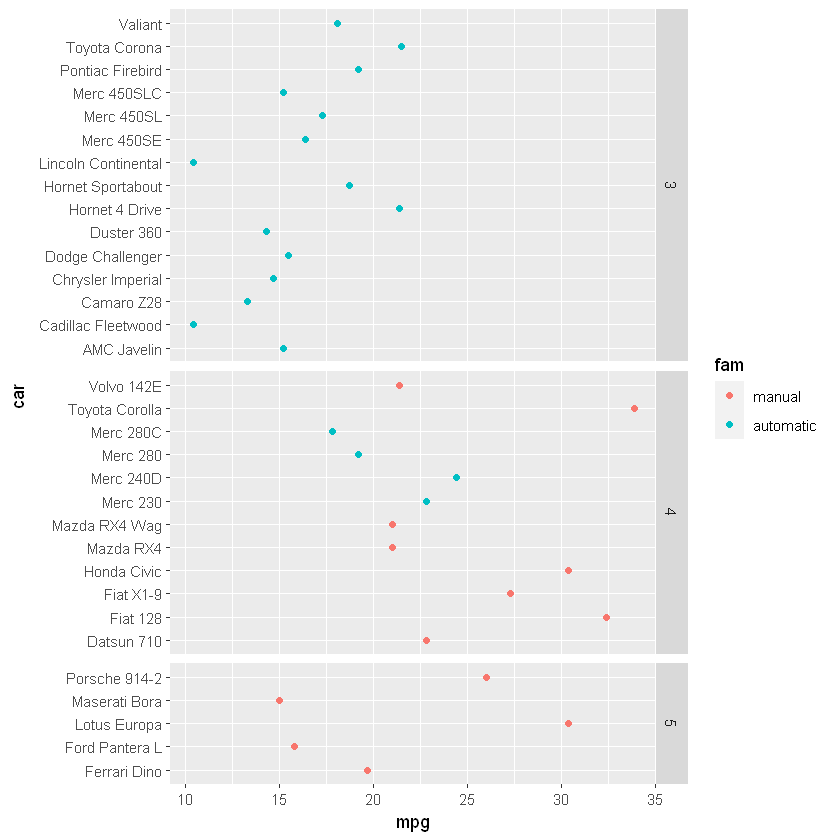

In [20]:
ggplot(mtcars, aes(x = mpg, y = car, color = fam)) +
  geom_point() +
  # Free the y scales and space
  facet_grid(rows = vars(gear),
             scales = "free_y",
             space = "free_y")

### **`08- Wrapping for many levels`**

Add a facet_wrap() layer and specify:

-   The `year` variable with an argument using the `vars()` function,

In [23]:
Vocab <- read.csv("..\\00_Datasets\\Vocab.csv", header=TRUE)

`geom_smooth()` using formula 'y ~ x'



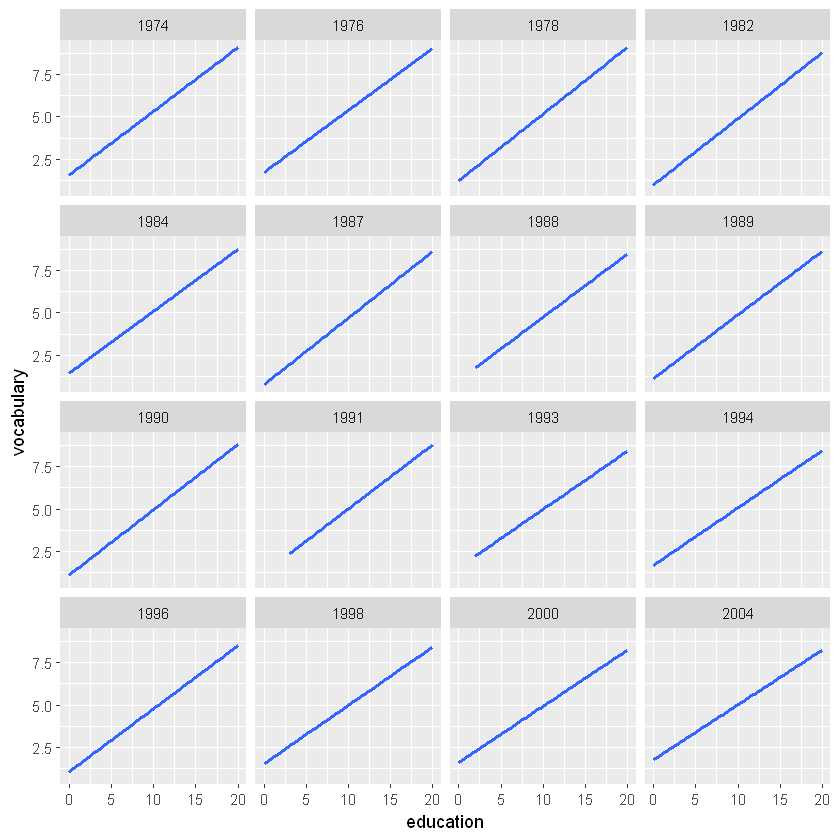

In [24]:
ggplot(Vocab, aes(x = education, y = vocabulary)) +
  stat_smooth(method = "lm", se = FALSE) +
  # Create facets, wrapping by year, using vars()
  facet_wrap(vars(year))

-   Add a `facet_wrap()` layer and specify the `year` variable with a formula notation (`~`).


`geom_smooth()` using formula 'y ~ x'



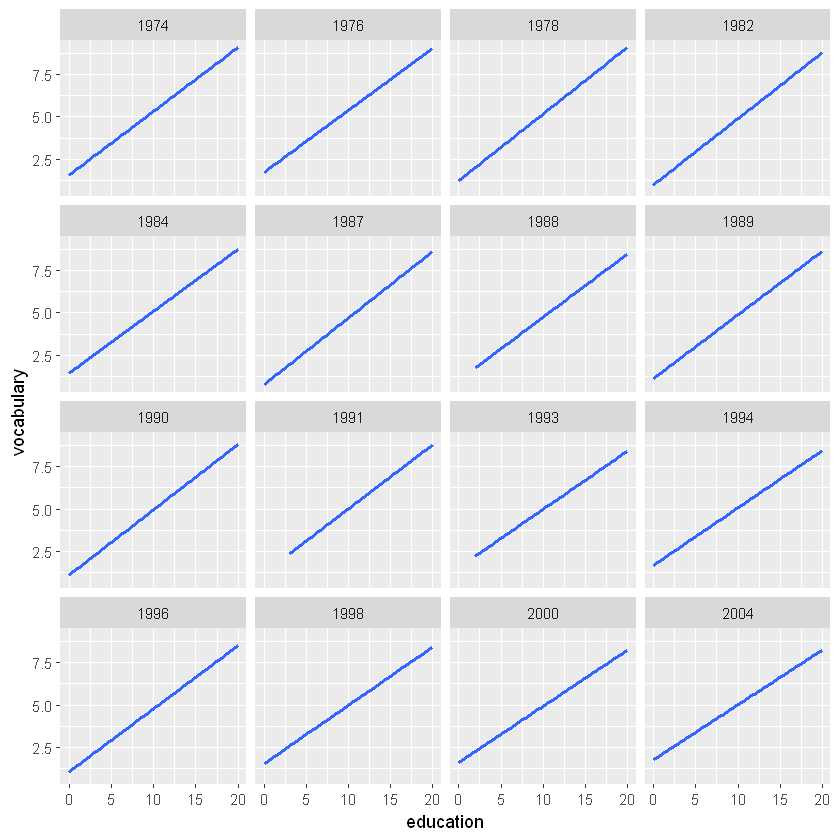

In [25]:
ggplot(Vocab, aes(x = education, y = vocabulary)) +
  stat_smooth(method = "lm", se = FALSE) +
  # Create facets, wrapping by year, using a formula
  facet_wrap(~ year)

Add a `facet_wrap()` layer and specify:

-   Formula notation as before, and `ncol` set to `11`.

`geom_smooth()` using formula 'y ~ x'



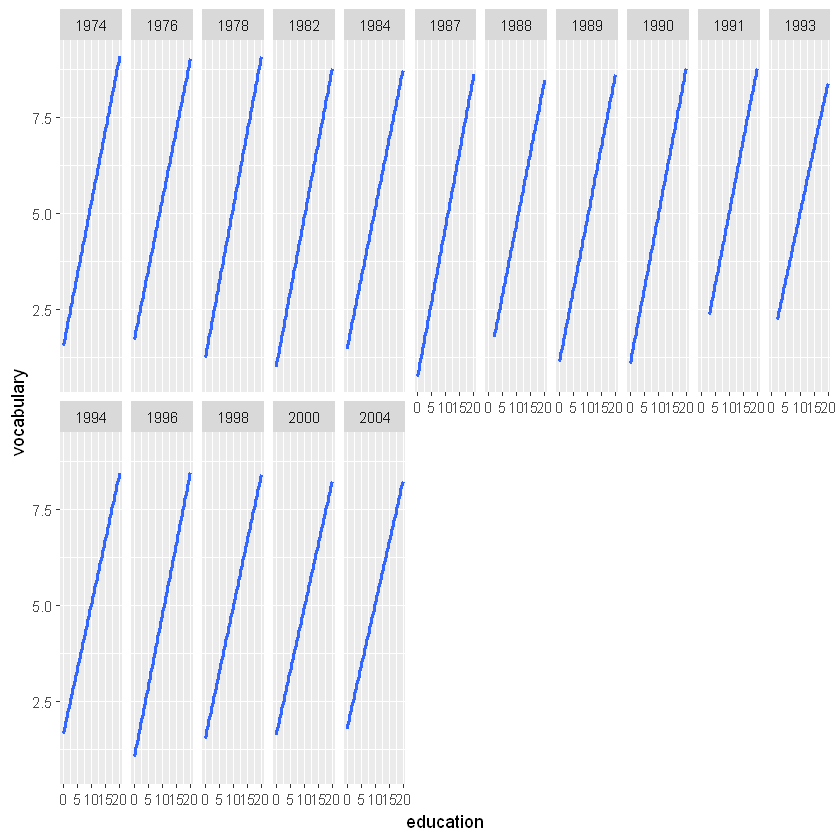

In [26]:
ggplot(Vocab, aes(x = education, y = vocabulary)) +
  stat_smooth(method = "lm", se = FALSE) +
  # Update the facet layout, using 11 columns
  facet_wrap(~ year, ncol = 11)

### **`09-Margin plots`**

Facets are great for seeing subsets in a variable, but sometimes you want to see *both* those subsets *and* all values in a variable.

Here, the `margins` argument to `facet_grid()` is your friend.

-   `FALSE` (default): no margins.

-   `TRUE`: add margins to every variable being faceted by.

-   `c("variable1", "variable2")`: only add margins to the variables listed.

To make it easier to follow the facets, we've created two factor variables with proper labels --- `fam` for the transmission type, and `fvs` for the engine type, respectively.

*Zoom the graphics window to better view your plots.*

-   Update the plot to facet the rows by `fvs` and `fam`, and columns by `gear`.

-   Add all possible margins to the plot.

In [27]:
str(mtcars)

'data.frame':	32 obs. of  17 variables:
 $ X       : chr  "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ mpg     : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl     : int  6 6 4 6 8 6 8 4 4 6 ...
 $ disp    : num  160 160 108 258 360 ...
 $ hp      : int  110 110 93 110 175 105 245 62 95 123 ...
 $ drat    : num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt      : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec    : num  16.5 17 18.6 19.4 17 ...
 $ vs      : int  0 0 1 1 0 1 0 1 1 1 ...
 $ am      : int  1 1 1 0 0 0 0 0 0 0 ...
 $ gear    : int  4 4 4 3 3 3 3 4 4 4 ...
 $ carb    : int  4 4 1 1 2 1 4 2 2 4 ...
 $ fcyl    : int  6 6 4 6 8 6 8 4 4 6 ...
 $ fam     : Factor w/ 2 levels "manual","automatic": 1 1 1 2 2 2 2 2 2 2 ...
 $ car     : chr  "Mazda RX4" "Mazda RX4 Wag" "Datsun 710" "Hornet 4 Drive" ...
 $ fcyl_fam: chr  "6:01" "6:01" "4:01" "6:00" ...
 $ fvs     : chr  "V-shaped" "V-shaped" "straight" "straight" ...


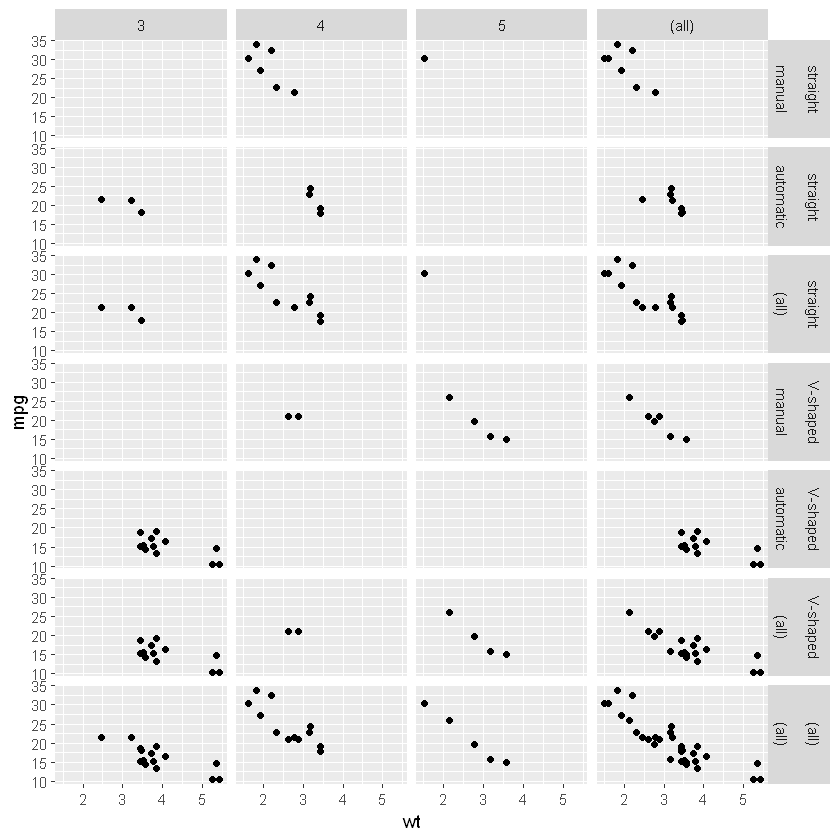

In [28]:
ggplot(mtcars, aes(x = wt, y = mpg)) + 
  geom_point() +
  # Facet rows by fvs and cols by fam
  facet_grid(rows = vars(fvs, fam), cols = vars(gear), margins = TRUE)

-   Update the facets to only show margins on `"fam"`.

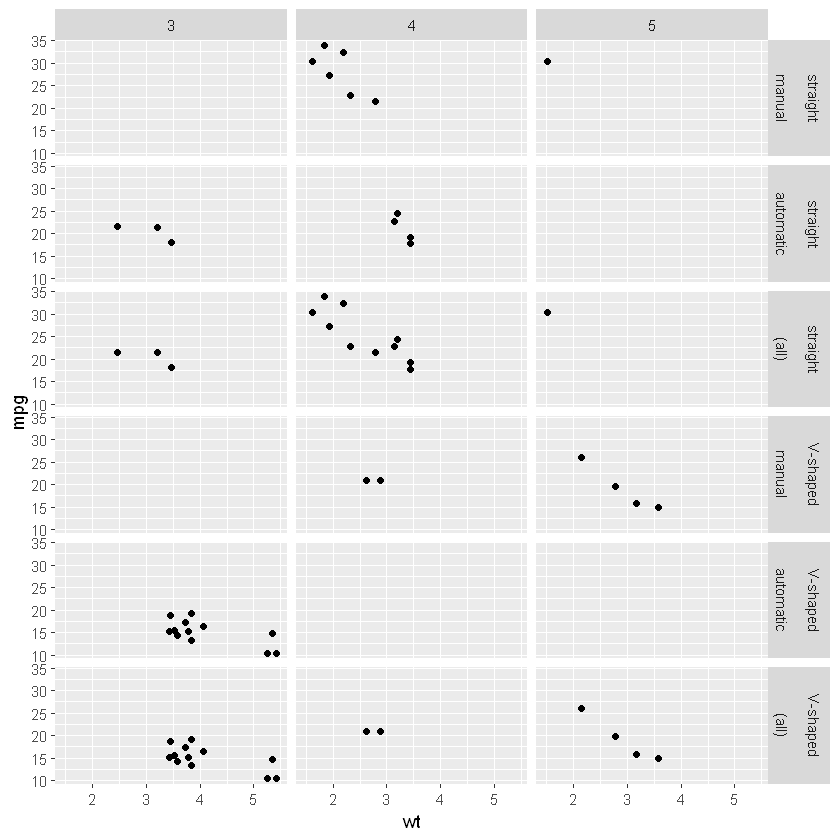

In [29]:
ggplot(mtcars, aes(x = wt, y = mpg)) + 
  geom_point() +
  # Update the facets to only show margins on gear and fvs
  facet_grid(rows = vars(fvs, fam), cols = vars(gear), margins = "fam")

-   Update the facets to only show margins on `"gear"` and `"fvs"`.

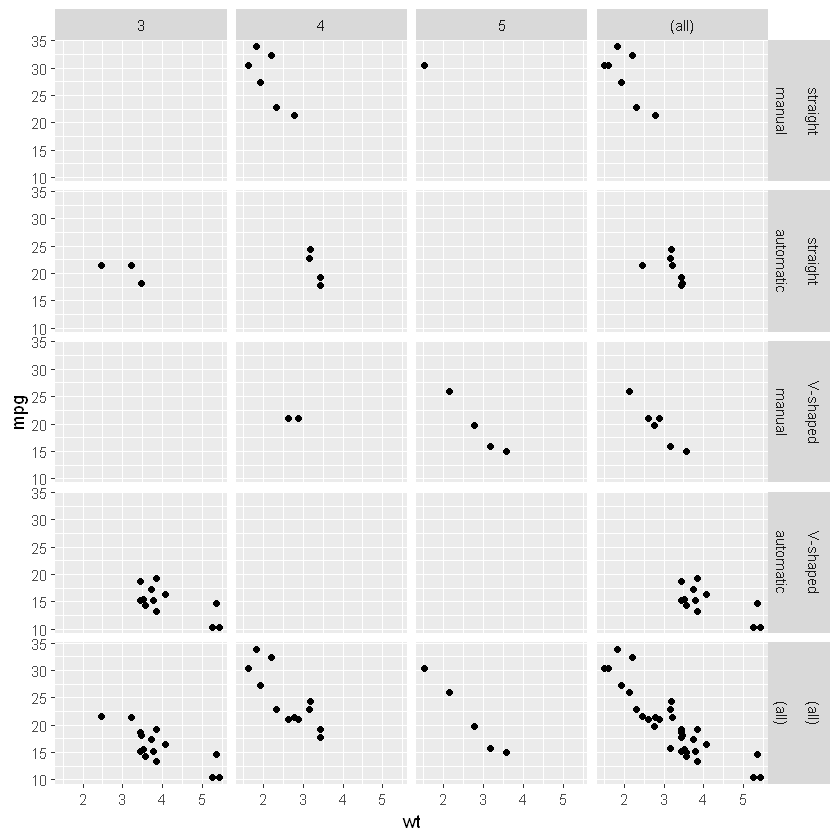

In [30]:
    ggplot(mtcars, aes(x = wt, y = mpg)) + 
      geom_point() +
      # Update the facets to only show margins on gear and fvs
      facet_grid(rows = vars(fvs, fam), cols = vars(gear), margins = c("gear", "fvs"))

### `The End`